['05_12_carroussel_ls2n_noperturb_N1.csv', '05_12_carroussel_ls2n_noperturb_N2.csv', '05_12_carroussel_ls2n_noperturb_N3.csv', '05_12_carroussel_ls2n_perturb_1000_1000_N1.csv', '05_12_carroussel_ls2n_perturb_1000_1000_N2.csv', '05_12_carroussel_ls2n_perturb_1000_1000_N3.csv', '05_12_carroussel_ls2n_perturb_1000_100_N1.csv', '05_12_carroussel_ls2n_perturb_1000_100_N2.csv', '05_12_carroussel_ls2n_perturb_1000_100_N3.csv', '05_12_carroussel_ls2n_perturb_1000_1_N1.csv', '05_12_carroussel_ls2n_perturb_1000_1_N2.csv', '05_12_carroussel_ls2n_perturb_1000_1_N3.csv', '05_12_carroussel_ls2n_perturb_1000_2000_N1.csv', '05_12_carroussel_ls2n_perturb_1000_2000_N2.csv', '05_12_carroussel_ls2n_perturb_1000_2000_N3.csv', '05_12_carroussel_ls2n_perturb_1000_4000_N1.csv', '05_12_carroussel_ls2n_perturb_1000_4000_N2.csv', '05_12_carroussel_ls2n_perturb_1000_4000_N3.csv', '06_12_double_carrousel_1000_nmessage10000_N1.px4_1.data', '06_12_double_carrousel_1000_nmessage10000_N1.px4_4.data', '06_12_double_car

<AxesSubplot:>

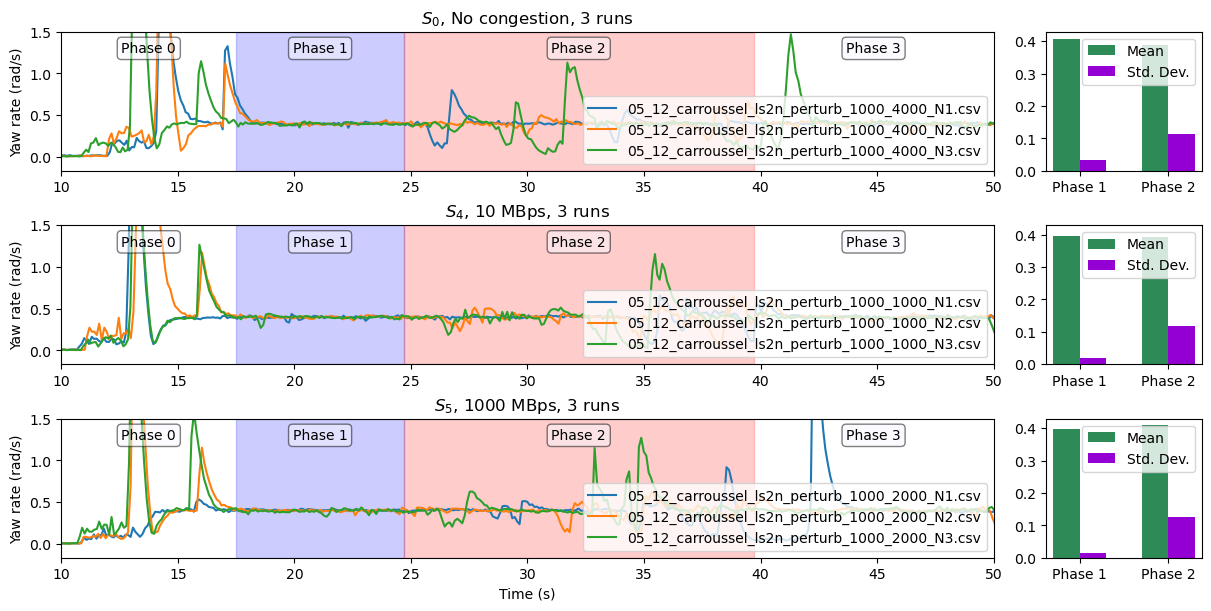

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

def plot_serie(path_to_csv, name_x, name_y):
    fig, ax = plt.subplots()
    
    serie = pd.read_csv(str(path_to_csv), sep=' ', header=None)
        
    ax.plot(serie[0], serie[1], label='yaw_rate')

    ax.set_xlabel(str(name_x))
    ax.set_ylabel(str(name_y))

    return fig, ax

def plot_multiple_series(ax, path_to_folder, filter=None, start=0, end=None):

    exp_list = os.listdir(path_to_folder)
    if filter is not None:
        exp_list = [exp for exp in exp_list if filter in exp]
    exp_list.sort()
    if end is None:
        end = len(exp_list)
    print(exp_list)
    
    i=1
    for exp in exp_list[start:end]:
        serie = pd.read_csv(str(path_to_folder+'/'+exp), sep=' ', header=None)
        
        if filter == "px4_1":
            serie[0] = serie[0] - 2.0
        
        # ax.plot(serie[0], serie[1], label="Run "+str(i))
        ax.plot(serie[0], serie[1], label=exp)
        i += 1

    # ax.vlines(x=17.5, ymin=0, ymax=1.5, colors='black', linestyles='solid')
    # ax.vlines(x=24.7, ymin=0, ymax=1.5, colors='black', linestyles='solid')
    # ax.vlines(x=39.7, ymin=0, ymax=1.5, colors='black', linestyles='solid')
    phase0_start = 10
    phase0_end = 17.5
    phase1_start = 17.5
    phase1_end = 24.7
    phase2_start = 24.7
    phase2_end = 39.7
    phase3_start = 39.7
    phase3_end = 50
    
    
    ax.axvspan(xmin=17.5, xmax=24.7, alpha=0.2, color='b')
    ax.axvspan(xmin=24.7, xmax=39.7, alpha=0.2, color='r')
    props = dict(boxstyle='round', facecolor='ghostwhite', alpha=0.5)
    ax.text(x=phase0_start+(phase0_end-phase0_start)/2, y=1.3, s="Phase 0", horizontalalignment='center', verticalalignment='center', bbox=props)
    ax.text(x=phase1_start+(phase1_end-phase1_start)/2, y=1.3, s="Phase 1", horizontalalignment='center', verticalalignment='center', bbox=props)
    ax.text(x=phase2_start+(phase2_end-phase2_start)/2, y=1.3, s="Phase 2", horizontalalignment='center', verticalalignment='center', bbox=props)
    ax.text(x=phase3_start+(phase3_end-phase3_start)/2, y=1.3, s="Phase 3", horizontalalignment='center', verticalalignment='center', bbox=props)

    ax.set_ylabel(str("Yaw rate (rad/s)"))
    
    ax.set_xlim(left=10, right=50)
    ax.set_ylim(top=1.5)
    
    ax.legend(loc='lower right')
    
    return ax

def plot_std_dev(ax, path_to_folder, filter=None, start=0, end=None):

    exp_list = os.listdir(path_to_folder)
    if filter is not None:
        exp_list = [exp for exp in exp_list if filter in exp]
    exp_list.sort()
    if end is None:
        end = len(exp_list)

    std_devs_no_congestion = []
    std_devs_congestion = []
    means_congestion = []
    means_no_congestion = []
    for exp in exp_list[start:end]:
        serie = pd.read_csv(str(path_to_folder+'/'+exp), sep=' ', header=None)
        index_start_congestion = np.argmax(serie[0]>24.6)
        index_end_congestion = np.argmax(serie[0]>39.6)
        index_stable_flight = np.argmax(serie[0]>17.5)
        std_dev_no_congestion = np.std(serie[1][index_stable_flight:index_start_congestion])
        mean_no_congestion = np.mean(serie[1][index_stable_flight:index_start_congestion])
        # print(serie[1][index_stable_flight:index_start_congestion])
        std_dev_congestion = np.std(serie[1][index_start_congestion:index_end_congestion])
        mean_congestion = np.mean(serie[1][index_start_congestion:index_end_congestion])
        std_devs_no_congestion.append(std_dev_no_congestion)
        std_devs_congestion.append(std_dev_congestion)
        means_congestion.append(mean_congestion)
        means_no_congestion.append(mean_no_congestion)
        # print(exp+" : "+str(std_dev_no_congestion)+" | "+str(std_dev_congestion))

    width = 0.3
    multiplier = 0
    phases = ("Phase 1", "Phase 2")
    
    means = [np.mean(means_no_congestion), np.mean(means_congestion)]
    stdevs = [np.mean(std_devs_no_congestion), np.mean(std_devs_congestion)]
    
    print(means)
    print(stdevs)
    
    colors_means = 'seagreen'
    colors_stdevs = 'darkviolet'
    
    index = np.arange(len(phases))
    # means_stdevs = {
    #     'Mean': (np.mean(means_no_congestion), np.mean(means_congestion)),
    #     'Std. Dev.': (np.mean(std_devs_no_congestion), np.mean(std_devs_congestion))
    # }
    # for key, value in means_stdevs.items():
    #     rects = ax.bar(index + multiplier * width, value, width, label=key, color=['salmon', 'indianred'])
    #     # for patch in rects.patches:
    #     #     patch.set_height(round(patch.get_height(), 3))
    #     # ax.bar_label(rects, padding=0)
    #     multiplier += 1
    
    # Plot bars for Means
    for i, value in enumerate(means):
        ax.bar(index[i], value, width, label='Mean' if i == 0 else "", color=colors_means)

    # Plot bars for stdevs
    for i, value in enumerate(stdevs):
        ax.bar(index[i] + width, value, width, label='Std. Dev.' if i == 0 else "", color=colors_stdevs)
        
    ax.set_xticks(index + 0.5*width, phases)
    ax.legend(loc='upper right')
        

    return ax


# exp_list = os.listdir('../data/yaw_rates')
# for exp in exp_list:
#     print("Potting "+exp)
#     fig, ax = plot_serie('../data/yaw_rates/'+exp, 'time', 'yaw_rate')

plt.rcParams['figure.figsize'] = [12, 6]
gs_kw = dict(width_ratios=[6, 1])

fig, axs = plt.subplots(nrows=3,ncols=2, gridspec_kw=gs_kw, layout='constrained', sharey='col')

plot_multiple_series(axs[0][0], '../data/yaw_rates', start=15, end=18)
# plot_multiple_series(axs[1][0], '../data/yaw_rates', 'time', 'yaw_rate', start=3, end=6)
plot_multiple_series(axs[1][0], '../data/yaw_rates', start=3, end=6)
plot_multiple_series(axs[2][0], '../data/yaw_rates', start=12, end=15)
axs[0][0].set_title("$S_{0}$, No congestion, 3 runs")
axs[1][0].set_title("$S_{4}$, 10 MBps, 3 runs")
axs[2][0].set_title("$S_{5}$, 1000 MBps, 3 runs")
# axs[1][0].set_title("1 MBps, 3 runs")
axs[2][0].set_xlabel("Time (s)")

plot_std_dev(axs[0][1], '../data/yaw_rates', start=15, end=18)
# plot_std_dev(axs[1][1], '../data/yaw_rates', 'time', 'yaw_rate', start=3, end=6)
plot_std_dev(axs[1][1], '../data/yaw_rates', start=3, end=6)
plot_std_dev(axs[2][1], '../data/yaw_rates', start=12, end=15)


['06_12_double_carrousel_1000_nmessage10000_N1.px4_1.data', '06_12_double_carrousel_1000_nmessage10000_N2.px4_1.data', '06_12_double_carrousel_1000_nmessage10000_N3.px4_1.data', '06_12_double_carrousel_noperturb_N1.px4_1.data', '06_12_double_carrousel_noperturb_N2.px4_1.data', '06_12_double_carrousel_noperturb_N3.px4_1.data']
['06_12_double_carrousel_1000_nmessage10000_N1.px4_4.data', '06_12_double_carrousel_1000_nmessage10000_N2.px4_4.data', '06_12_double_carrousel_1000_nmessage10000_N3.px4_4.data', '06_12_double_carrousel_noperturb_N1.px4_4.data', '06_12_double_carrousel_noperturb_N2.px4_4.data', '06_12_double_carrousel_noperturb_N3.px4_4.data']
[0.41178255212906056, 0.4023599049295775]
[0.039975367540179864, 0.040413871337919606]
[0.41321100746268663, 0.403718397887324]
[0.05103936134596569, 0.03616666208808941]


<AxesSubplot:>

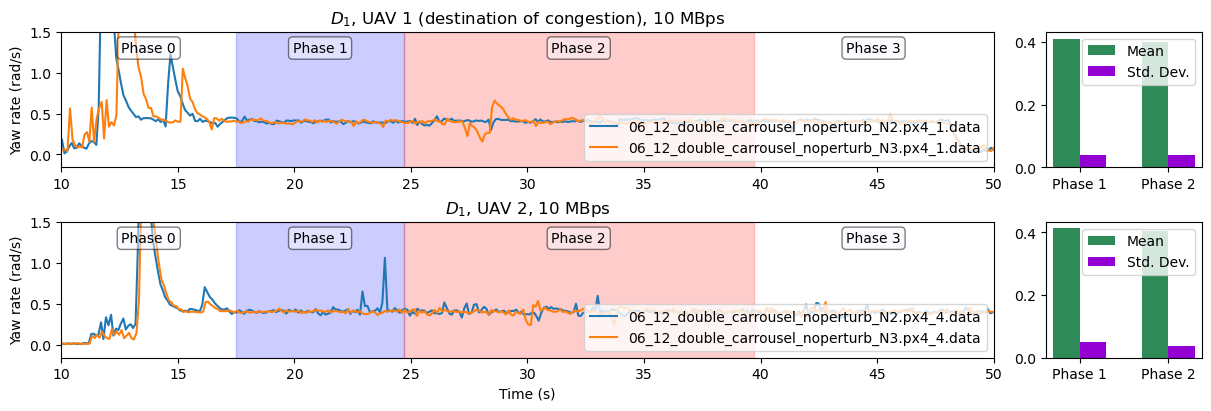

In [126]:
plt.rcParams['figure.figsize'] = [12, 4]

fig, axs = plt.subplots(nrows=2,ncols=2, gridspec_kw=gs_kw, layout='constrained', sharey='col')

plot_multiple_series(axs[0][0], '../data/yaw_rates', filter='px4_1', start=4, end=6)
plot_multiple_series(axs[1][0], '../data/yaw_rates', filter='px4_4', start=4, end=6)
axs[0][0].set_title("$D_{1}$, UAV 1 (destination of congestion), 10 MBps")
axs[1][0].set_title("$D_{1}$, UAV 2, 10 MBps")
axs[1][0].set_xlabel("Time (s)")

plot_std_dev(axs[0][1], '../data/yaw_rates', filter='px4_1', start=4, end=6)
plot_std_dev(axs[1][1], '../data/yaw_rates', filter='px4_4', start=4, end=6)
